# Чтение/Запись данных

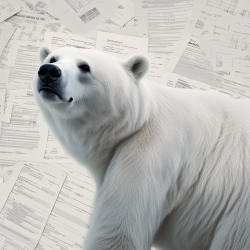

Импорт необходимых библиотек

In [1]:
import polars as pl
import pandas as pd

## Чтение данных

В *Polars* существует множество встроенных методов для загрузки данных из различных источников. Благодаря своей скорости и простоте, *Polars* поддерживает работу с большинством популярных форматов.

Основные источники данных и соответствующие методы в *Polars*
1. **CSV** - `pl.read_csv()`
2. **EXCEL** - `pl.read_excel()`
3. **PARQUET** - `pl.read_parquet()`
4. **JSON** - `pl.read_json()`
5. **Pandas DataFrame** - `pl.from_pandas()`: Преобразование *Pandas DataFrame* в *Polars DataFrame*
6. **Database (SQL)** - `pl.read_database()`: Чтение SQL-запроса через *SQLAlchemy* (требует *SQLAlchemy* + драйвер БД)


### **CSV**

Comma-Separated Values (CSV) - значения, разделенные запятыми. Это текстовый формат, предназначенный для представления табличных данных. Строка таблицы соответствует строке текста, которая содержит одно или несколько полей, разделенных запятыми. CSV является одним из наиболее популярных форматов для хранения табличных данных. Файл формата CSV имеет расширение `.csv`.

Для загрузки данных из CSV-файлов используем метод `read_csv()`, который имеет достаточно большое количество параметров. Основные из них:
- `source`: Путь к файлу, в данный параметр передаём путь к файлу.
- `has_header`: Является ли первая строка заголовками (по умолчанию True).
- `columns`: Список индексов или имён колонок, которые нужно выбрать из файла.
- `new_columns`: Переименование заголовков столбцов (после чтения файла).
- `separator`: Разделитель между значениями в строке (по умолчанию ',').
- `skip_rows`: Чтение csv файла после пропуска n строк (по умолчанию ничего не пропускаем).
- `schema`: Явно указанный тип данных для каждой колонки. Полезно, если хотим избежать автоматического определения типов.
- `null_values`: Значения, которые должны интерпретироваться как `null`.
- `ignore_errors`: При ошибке парсинга продолжить чтение следующих строк (по умолчанию False).
- `infer_schema`: Если True, *Polars* попытается автоматически определить типы данных по первым `infer_schema_length` строкам. Если False, все столбцы будут иметь тип `pl.String` (по умолчаниюTrue).
- `infer_schema_length`: Число строк, используемых для определения схемы. Большее значение позволяет точнее определить типы (по умолчанию 100 строк).
- `batch_size`: Число строк, читаемых за один раз (по умолчанию 8192 строка).
- `encoding`: Кодировка файла (по умолчанию 'utf8').
- `row_index_name`: Добавить колонку с номером строки (индексом). Если задано, эта колонка будет первой.
- `row_index_offset`: Начальное значение индекса строк. Только если задан `row_index_nam` (По умолчанию с 0).

Загрузим датасет

In [2]:
# Наименование колонок
columns = ["id", "carat", "cut", "color", "clarity", "depth", "table", "price", "x", "y", "z"]

# Формируем df на основе csv-файла
df_from_csv = pl.read_csv(
    # Путь к файлу
    source="https://raw.githubusercontent.com/m-ardat/Library_Polars/main/dataset/diamonds.csv",
    # Нет заголовков
    has_header=False,
    # Пропустить первую строку
    skip_rows=1,
    # Залаем наименование колонок
    new_columns=columns
)

# Выводим первые 4 строки
print(df_from_csv.head(4))

shape: (4, 11)
┌─────┬───────┬─────────┬───────┬───┬───────┬──────┬──────┬──────┐
│ id  ┆ carat ┆ cut     ┆ color ┆ … ┆ price ┆ x    ┆ y    ┆ z    │
│ --- ┆ ---   ┆ ---     ┆ ---   ┆   ┆ ---   ┆ ---  ┆ ---  ┆ ---  │
│ i64 ┆ f64   ┆ str     ┆ str   ┆   ┆ i64   ┆ f64  ┆ f64  ┆ f64  │
╞═════╪═══════╪═════════╪═══════╪═══╪═══════╪══════╪══════╪══════╡
│ 1   ┆ 0.23  ┆ Ideal   ┆ E     ┆ … ┆ 326   ┆ 3.95 ┆ 3.98 ┆ 2.43 │
│ 2   ┆ 0.21  ┆ Premium ┆ E     ┆ … ┆ 326   ┆ 3.89 ┆ 3.84 ┆ 2.31 │
│ 3   ┆ 0.23  ┆ Good    ┆ E     ┆ … ┆ 327   ┆ 4.05 ┆ 4.07 ┆ 2.31 │
│ 4   ┆ 0.29  ┆ Premium ┆ I     ┆ … ┆ 334   ┆ 4.2  ┆ 4.23 ┆ 2.63 │
└─────┴───────┴─────────┴───────┴───┴───────┴──────┴──────┴──────┘


### **EXCEL**

Excel (XLS/XLSX) — это бинарный формат электронных таблиц, разработанный Microsoft. Формат поддерживает хранение данных в виде таблиц, где информация организована по строкам и столбцам. В ячейках могут находиться числа, текст, формулы, даты, а также стили оформления (цвета, шрифты, границы) и другие элементы.
 - Формат XLS — устаревший формат на основе двоичной структуры, использовался в ранних версиях Excel.
 - Формат XLSX — современный формат, основанный на XML и ZIP-упаковке.
   
Файлы Excel имеют расширения:
- `.xls` — для старого формата
- `.xlsx` — для нового формата
  
Этот формат широко используется в бизнесе, аналитике, финансах и других сферах благодаря своей гибкости и поддержке множества возможностей форматирования и вычислений.

Для загрузки данных из Excel-файлов используем метод `read_excel()`, который имеет достаточно большое количество параметров. Основные из них:
- `source`: Путь к файлу, в данный параметр передаём путь к файлу.
- `sheet_id`: Номер(а) листа(ов), которые нужно прочитать.
-  `sheet_name`: Имя(а) листа(ов), которые нужно прочитать. Не может использоваться вместе с `sheet_id`!
- `engine`: Движок для парсинга файла (доступные варианты: 'calamine' (стоит по умолчанию, самый быстрый), 'openpyxl', 'xlsx2csv').
- `has_header`: Является ли первая строка заголовками (по умолчанию True).
- `columns`: Список имён или индексов колонок, которые нужно прочитать. Если не указано — читаются все колонки.
- `schema_overrides`: Переопределение типов данных для некоторых или всех колонок (передавать словарь вида {"Наименование колонки": Тип данных}.
- `infer_schema_length`: Число строк, используемых для определения схемы.
- `drop_empty_rows`: Удалять пустые строки при чтении (по умолчанию True).
- `drop_empty_cols`: Удалять пустые колонки (по умолчанию True).

**Важно**: чтобы пользоваться `read_excel()` необходимо установить пакет `fastexcel`.

Загрузим датасет

In [3]:
# Формируем df на основе csv-файла
df_from_excel = pl.read_excel(
    # Путь к файлу
    source="https://raw.githubusercontent.com/m-ardat/Library_Polars/main/dataset/lsg_stats_2025_q1.xlsx"
)

# Выводим первые 4 строки
print(df_from_excel.head(4))

shape: (4, 7)
┌──────────┬──────────┬──────────┬───────────┬─────────────────┬─────────────────┬─────────────────┐
│ City     ┆ Suburb   ┆ Sales 1Q ┆ Median 1Q ┆ Sales 1Q 2025   ┆ Median 1Q 2025  ┆ Median Change   │
│ ---      ┆ ---      ┆ 2024     ┆ 2024      ┆ ---             ┆ ---             ┆ ---             │
│ str      ┆ str      ┆ ---      ┆ ---       ┆ i64             ┆ i64             ┆ f64             │
│          ┆          ┆ i64      ┆ i64       ┆                 ┆                 ┆                 │
╞══════════╪══════════╪══════════╪═══════════╪═════════════════╪═════════════════╪═════════════════╡
│ ADELAIDE ┆ ADELAIDE ┆ 7        ┆ 1345000   ┆ 6               ┆ 1450000         ┆ 0.078067        │
│ ADELAIDE ┆ NORTH    ┆ 5        ┆ 1500000   ┆ 10              ┆ 2450000         ┆ 0.633333        │
│          ┆ ADELAIDE ┆          ┆           ┆                 ┆                 ┆                 │
│ ADELAIDE ┆ ALDGATE  ┆ 7        ┆ 1180000   ┆ 5               ┆ 1610500     

### **JSON**

Метод `pl.read_json()` позволяет загружать данные из JSON-файла или JSON-строки напрямую в объект *DataFrame*.

JSON (JavaScript Object Notation) — это популярный формат обмена данными, который легко читается людьми и эффективно обрабатывается программами. Он часто используется для хранения и передачи структурированной информации, особенно в веб-API и конфигурационных файлах.

*Polars* поддерживает чтение массивов JSON-объектов, где каждый объект представляет собой строку таблицы, а ключи — названия столбцов.

Параметры метода `pl.read_json()`:
- `source`: Источник данных,
- `schema`: Определение схемы - позволяет задать структуру данных для столбцов и их типов,
- `schema_overrides`: Переопределение типов - позволяет изменить типы данных отдельных столбцов, даже если они уже были определены,
- `infer_schema_length`: Число строк, используемых для определения схемы.

Например, чтение из строки JSON:

In [25]:
from io import StringIO

json_str = '[{"foo":1,"bar":6},{"foo":2,"bar":7},{"foo":3,"bar":8}]'

df_json = pl.read_json(StringIO(json_str))
print(df_json)

shape: (3, 2)
┌─────┬─────┐
│ foo ┆ bar │
│ --- ┆ --- │
│ i64 ┆ i64 │
╞═════╪═════╡
│ 1   ┆ 6   │
│ 2   ┆ 7   │
│ 3   ┆ 8   │
└─────┴─────┘


### **PARQUET** 

Формат Parquet — это высокоэффективный, столбцовый формат хранения данных, широко используемый в системах аналитики, таких как *Spark*, *DuckDB*, и, конечно, *Polars*. Он особенно хорош для работы с большими объёмами данных, так как:
- занимает мало места (поддержка сжатия),
- быстро читает только нужные столбцы,
- хранит метаданные и статистику для оптимизации запросов.

В *polars* чтение Parquet-файлов реализовано через метод `pl.read_parquet()`, который содержит в себе множество параметров. Основные из них: 
- `source`: путь к файлу или объекту;
- `columns`: выбор столбцов - читаем только указанные столбцы, что ускоряет загрузку и экономит память;
- `n_rows`: читает только первые n строк (полезно для предварительного просмотра);
- `row_index_name`: добавляет специальный столбец с номерами строк (индексами);
- `row_index_offset`: задаёт для `row_index_name` начальной отсчёт с любого числа (по умолчанию задаётся 0);
- `parallel`: параллельное чтение. Управляет, как Polars распараллеливает чтение:

        -- 'auto' — выбирает оптимальный способ (по умолчанию),
        -- 'columns' — параллельно читает столбцы,
        -- 'row_groups' — параллельно читает группы строк (рекомендуется для больших файлов),
        -- 'none' — без параллелизма;

- `schema`: явное задание схемы для полей;
- `low_memory`: режим низкого потребления памяти. Полезно для очень больших файлов на машинах с малым объёмом RAM. Жертвует скоростью ради экономии памяти (по умолчанию False);
- `missing_columns`: обработка отсутствующих столбцов. Если в `schema` указан столбец, которого нет в файле:

      -- 'raise' — ошибка (по умолчанию),
      -- 'insert' — добавить столбец со значениями null.

In [33]:
# Наименование нужных колонок
columns_need = ["Rainfall", "Sunshine", "WindGustSpeed", "Pressure3pm", "RISK_MM", "RainToday", "RainTomorrow"]

# Формируем df на основе csv-файла
df_parquet = pl.read_parquet(
    # Путь к файлу
    source="https://raw.githubusercontent.com/m-ardat/Library_Polars/main/dataset/weather.parquet",
    # Указывем только нужные столбцы
    columns=columns_need,
    # Добавим специальный столбец индекс
    row_index_name="row_idx",
    # Задаем индексы с 1
    row_index_offset=1
)

# Выводим первые 4 строки
print(df_parquet.head(4))

shape: (4, 7)
┌──────────┬──────────┬───────────────┬─────────────┬─────────┬───────────┬──────────────┐
│ Rainfall ┆ Sunshine ┆ WindGustSpeed ┆ Pressure3pm ┆ RISK_MM ┆ RainToday ┆ RainTomorrow │
│ ---      ┆ ---      ┆ ---           ┆ ---         ┆ ---     ┆ ---       ┆ ---          │
│ f64      ┆ str      ┆ str           ┆ f64         ┆ f64     ┆ str       ┆ str          │
╞══════════╪══════════╪═══════════════╪═════════════╪═════════╪═══════════╪══════════════╡
│ 0.0      ┆ 6.3      ┆ 30            ┆ 1015.0      ┆ 3.6     ┆ No        ┆ Yes          │
│ 3.6      ┆ 9.7      ┆ 39            ┆ 1008.4      ┆ 3.6     ┆ Yes       ┆ Yes          │
│ 3.6      ┆ 3.3      ┆ 85            ┆ 1007.2      ┆ 39.8    ┆ Yes       ┆ Yes          │
│ 39.8     ┆ 9.1      ┆ 54            ┆ 1007.0      ┆ 2.8     ┆ Yes       ┆ Yes          │
└──────────┴──────────┴───────────────┴─────────────┴─────────┴───────────┴──────────────┘


### **Database (SQL)**

Большинство реальных данных хранятся в базах данных (БД) - таких PostgreSQL, MySQL, ORACLE, ClickHouse и т.д. Чтобы их обработать или проанализировать, мы сначала должны извлечь их оттуда. Можно представить, что БД - это «склад», а *Polars* — это «рабочий инструмент», где мы разбираем, сортируем и анализируем данные. Чтобы начать работать, нужно сначала привезти товар со склада. Для этого есть метод `pl.read_database()` со следующими параметрами:
- `query`: SQL-запрос, который нужно выполнить;
- `connection`: соединение c БД;
- `iter_batches`: грузить батчами или сразу (по умолчанию False) - если True, возвращает итератор по *DataFrame*, где каждый фрейм — это порция данных (batch). Полезно при работе с большими объёмами данных, чтобы не загружать всё в память сразу.
- `batch_size`: размер одной порции данных;
- `schema_overrides`: словарь, в котором можно явно указать типы данных для определённых столбцов (например, `schema_overrides={"user_id": pl.UInt32, "score": pl.Float32}`);
- `infer_schema_length`: максимальное количество строк, которые *polars* просканирует для определения схемы данных (по умолчанию 100). Если None — сканируются все строки;
- `execute_options`: дополнительные параметр/параметры, которые передаются напрямую в метод выполнения запроса.

Например, подключение к БД Oracle с использованием SQLAlchemy:

```
# Импорт библиотек
import polars as pl
import oracledb as cx_Oracle
from sqlalchemy import create_engine

# Создание подключение к БД
engine = create_engine(f"oracle+oracledb://{login}:{password}@{dsn}", echo=False, max_identifier_length=128)

# Запрос
quare = f"""
    SELECT *
    FROM table
    WHERE 1=1
        AND salary > 100
        AND EXTRACT(YEAR FROM dt) = 2024
"""
# Читаем в DataFrame
df = pl.read_database(quare, engine, infer_schema_length=None)

# Создание подключение к БД
engine.dispose()
```

Объяснение кода:
- `import oracledb as cx_Oracle` - *oracledb* используется для работы с базой данных Oracle;
- `from sqlalchemy import create_engine` - *sqlalchemy* предоставляет инструменты для работы с базами данных через ORM (Object-Relational Mapping);
- `engine = create_engine(f"oracle+oracledb://{login}:{password}@{dsn}", echo=False, max_identifier_length=128)`- в этой строке создается объект `engine`, который представляет собой соединение с базой данных:

        -- `login` и `password` — это переменные, содержащие учетные данные для подключения,
        -- `dsn` — это место для подстановки DSN, который указывает на конкретную базу данных,
        -- `echo=False` - отключает вывод SQL-запросов в консоль,
        -- `max_identifier_length=128` - устанавливает максимальную длину идентификаторов (например, имен таблиц и столбцов);
- Далее создается SQL-запрос, который выбирает все записи из таблицы, где `salary` больше 100 и год из столбца dt равен 2024;
- `df = pl.read_database(quare, engine, infer_schema_length=None)` - выполняется SQL-запрос и результаты загружаются в *DataFrame*;
- `engine.dispose()` - закрываем соединение с базой данных, освобождая ресурсы.

## Запись данных

В *Polars* есть множество методов для записи данных в различные форматы. Ниже приведён список основных методов с кратким описанием и примерами.

Основные методы сохранения (записи) *DataFrame* в *Polars*:
1. **CSV** - `df.write_csv()`: Сохраняет *DataFrame* в файл формата CSV
2. **EXCEL** - `df.write_excel()`: Сохраняет *DataFrame* в файл формата Excel
3. **Parquet** - `df.write_parquet()`: Сохраняет в бинарный формат Parquet (быстро и компактно)
4. **JSON** - `df.write_json()`: Сохраняет в JSON-файл (в разных режимах: массив, строки и т.д.)
5. **Pandas DataFrame** - `df.to_pandas()`: Преобразование в *Pandas DataFrame*
6. **Database (SQL)** - `df.write_database()`: Запись таблицы в БД

### **CSV**

Метод `write_csv()` имеет множество параметров, основные из них:
- `file` - Наименование и путь, где должен храниться файл.
- `include_header` - Включать ли заголовки (названия столбцов) в выходной файл (по умолчанию True).
- `separator` - Символ, который будет использоваться как разделитель полей между значениями (по умолчанию ',').
- `batch_size` - Число строк, которые обрабатываются за один раз (по умолчанию 1024).
- `float_precision` - Количество знаков после запятой для вывода чисел с плавающей точкой.
- `null_value`: Строка, которая будет использоваться для представления null-значений (по умолчанию — пустая строка "").

Запись в csv

In [4]:
df_from_csv.write_csv(file="save_csv.csv")

### **EXCEL**

Метод `write_excel()` из *polars* используется для записи *DataFrame* в Excel-файл с поддержкой форматирования через библиотеку *xlsxwriter*. 

Основные параметры данного метода:
- `workbook`: Наименование и путь, где должен храниться файл.
- `worksheet`: Имя листа. Если не указан, будет создан новый лист с именем "Sheet1".
-  `position`: Позиция, с которой начнётся запись таблицы. По умолчанию "A1".
- `table_style`: Стиль оформления таблицы.
- `table_name`: Имя таблицы в Excel. Это имя можно использовать в формулах и графиках.
- `column_formats`: Формат ячеек для конкретных столбцов. Форматы соответствуют Excel-форматам. Пример:`column_formats={"date": "dd/mm/yyyy","price":"0.00"}`
- `dtype_formats`: Форматы по типу данных. Например, все числа типа pl.Float64 будут отображаться с двумя знаками после запятой. `dtype_formats={pl.Float64: "0.00%", pl.Date: "yyyy-mm-dd"}`
- `conditional_formats`: Условное форматирование для указанных столбцов.
- `header_format`: Формат заголовка таблицы (шрифт, цвет и т.д.). `header_format={"bold": True, "font_color": "#702963"}`
- `column_widths`: Ширина колонок в пикселях. Можно указать:
  - общую ширину: 20
  - отдельно: {"name": 30, "age": 10}
- `formulas`: Добавление новых столбцов с формулами. Рекомендуется использовать структурированные ссылки. `formulas={"Total": "[@col1] + [@col2]"}`. При открытии в excel формула сохраняется.
- `float_precision`: Число знаков после запятой для значений с плавающей точкой. Не влияет на точность вычислений — только на отображение. По умолчанию 3 знака после запятой.
- `include_header`: Включать ли заголовок таблицы (по умолчанию True).
- `autofilter`: Включить фильтр (фильтрация по заголовкам). По умолчанию True.
- `autofit`: Автоматически подобрать ширину колонок по содержимому. По умолчанию False.
- `hidden_columns`: Скрыть указанные колонки
- `hide_gridlines`: Скрыть сетку (линии между ячейками) на листе. По умолчанию False.

Запись в excel

In [5]:
df_from_excel.head(2)

City,Suburb,Sales 1Q 2024,Median 1Q 2024,Sales 1Q 2025,Median 1Q 2025,Median Change
str,str,i64,i64,i64,i64,f64
"""ADELAIDE""","""ADELAIDE""",7,1345000,6,1450000,0.078067
"""ADELAIDE""","""NORTH ADELAIDE""",5,1500000,10,2450000,0.633333


In [6]:
df_from_excel.write_excel(
    # Наименование файла
    workbook="save_excel.xlsx",
    # Наименование листа
    worksheet="data",
    # Формат ячеек
    column_formats={
        "City": "str",
        "Suburb":"str",
        "Sales 1Q 2024":"#,##0",
        "Median 1Q 2024":"#,##0",
        "Sales 1Q 2025":"#,##0",
        "Median 1Q 2025":"#,##0"
    },
    # Формат для заголовков
    header_format={
        "bold": True,                    # Жирный
        "font_name": "Times New Roman",  # Шрифт
        "font_size": 12,                 # Размер шрифта
        "font_color": "#00008B",         # Темно-синий цвет текста (#00008B)
        "bg_color": "#FFFFFF"            # Белый цвет фона
    },
    # Создадим новый столбец на основании формулы
    formulas={"difference_sales": "[@Sales 1Q 2025] - [@Sales 1Q 2024]"},
    # Устанавливаем число знаков после запятой для значений с плавающей точкой
    float_precision = 2,
    # Автоматически подбираем ширину колонок
    autofit=True
)

В итоге получим файл следующего типа:
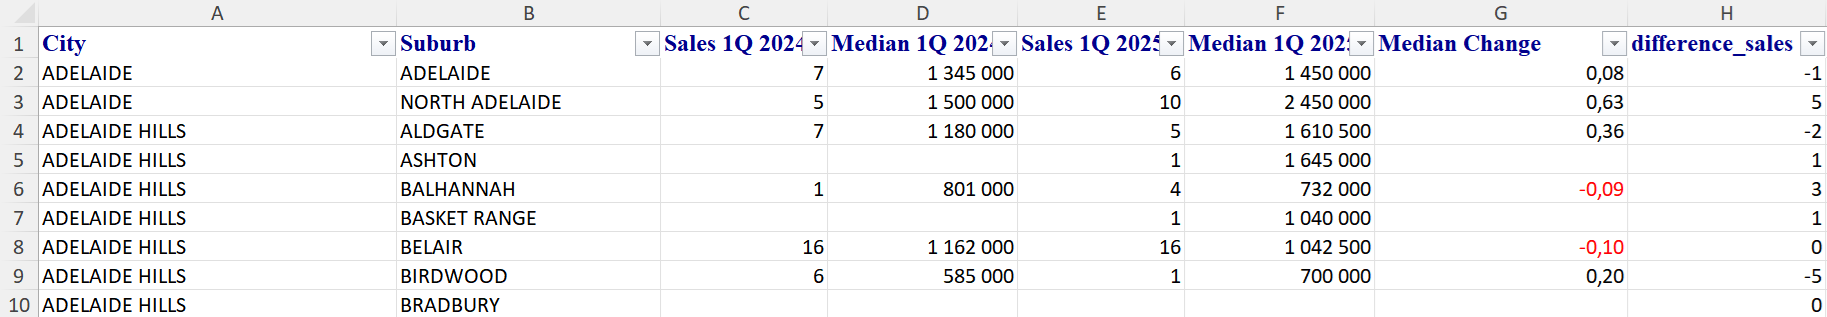

### **JSON**

Метод `write_json()` позволяет сериализовать объект *DataFrame* из *polars* в формат JSON - метод преобразует *DataFrame* в массив объектов JSON, где каждый объект соответствует одной строке, а ключи — названиям столбцов. Метод имеет всего один параметр - `file`: куда записывать результат. Если `file=None`, то вернёт строку JSON в памяти.

Пример:

In [35]:
df = pl.DataFrame({
    "name": ["Alice", "Bob", "Charlie"],
    "age": [25, 30, 35],
    "city": ["Moscow", "Berlin", "Tokyo"]
})

json_str = df.write_json()
print(json_str)

[{"name":"Alice","age":25,"city":"Moscow"},{"name":"Bob","age":30,"city":"Berlin"},{"name":"Charlie","age":35,"city":"Tokyo"}]


Или же:

In [36]:
df.write_json("users.json")

### **PARQUET**

Метод `write_parquet()` позволяет сохранить *DataFrame* в формате Apache Parquet. Основные параметры метода:
- `file` - где сохранить файл;
- `compression` - алгоритм сжатия:
  - `'zstd'` - баланса между скоростью и размером (применяется по умолчанию),
  - `'lz4'` - лучшее соотношение сжатие/скорость,
  - `'snappy'` - быстро сжатие, но не так экономно (подходит для временных файлов),
  - `'brotli'` - экономное сжатие, но медленнее,
  - `'gzip'` - совместим со старыми системами (например, Spark),
  - `'lzo'` - для специфичных случаев;
- `row_group_size` - размер группы строк (по умолчанию 262 144 строк, что равняется 512²);
- `statistics` - записывает статистику (по умолчанию True);
- `use_pyarrow` - использовать PyArrow вместо Rust (по умолчанию False).

Пример:

In [37]:
df = pl.DataFrame({
    "user_id": [1, 2, 3, 4],
    "country": ["RU", "DE", "RU", "JP"],
    "score": [85, 90, 78, 95]
})

df.write_parquet("users.parquet")

### **Database (SQL)**

Метод `write_database()` позволяет записать данные из *polars DataFrame* прямо в базу данных — будь то PostgreSQL, SQLite, Oracle, SQL Server и другие. Это мощный инструмент для ETL-процессов, выгрузки результатов анализа или синхронизации данных. 

Основные параметры метода:
- `table_name` - имя таблицы (может быть с указанием схемы, например: "schema.table");
- `connection` - подключение к БД;
- `if_table_exists` - праметр, отвечающий, как поступить при уже имеющейся таблице в БД:
  - `fail` - ошибка (по умолчанию),
  - `replace` - пересоздать таблицу,
  - `append` - добавить данные;
- `engine` - движок для записи (по умолчанию `'sqlalchemy'`);
- `engine_options` - дополнительные параметры, передаваемые движку.

Метод возвращает количетсво вставленных строк, если драйвер предоставляет такую информацию, иначе возвращает -1.

Пример записи в Oracle через SQLAlchemy:

```
# Импорт библиотек
import polars as pl
import oracledb as cx_Oracle
from sqlalchemy import create_engine, Integer, String, Date

# Создание подключения к Oracle
engine = create_engine(
    f"oracle+oracledb://{login}:{password}@{dsn}",
    echo=False,
    max_identifier_length=128
)

# Пример DataFrame
df = pl.DataFrame({
    "employee_id": [101, 102, 103],
    "name": ["Alice", "Bob", "Charlie"],
    "salary": [75000, 82000, 90000],
    "department": ["HR", "IT", "Finance"],
    "hire_date": ["2022-01-15", "2021-03-20", "2023-06-10"]
}).with_columns(pl.col("hire_date").str.to_date())

# Запись в таблицу Oracle
try:
    rows_affected = df.write_database(
        table_name="employees_staging",
        connection=engine,
        if_table_exists="replace",  # Пересоздать таблицу
        engine="sqlalchemy",        # Используем SQLAlchemy
        engine_options={
            # Указываем типы данных
            "dtype": {
                "employee_id": Integer,
                "name": String(50),
                "salary": Integer,
                "department": String(50),
                "hire_date": Date
            }
        }
    )
    print(f"Успешно записано строк: {rows_affected}")
except Exception as e:
    print(f"Ошибка при записи: {e}")
finally:
    engine.dispose()
```

Замечание: в параметре `engine_options` указали `"dtype"` для каждой колонки, который совместим с *SQLAlchemy*. Если бы мы не указывали, то данный пример отработал и таблица записалась в БД.

## **Примечание.**

Если у нас есть pandas *DataFrame*, и мы хотим конвертировать его в *polars DataFrame*, то для этого есть метод `from_pandas()`.

In [5]:
# Создаём Pandas DataFrame
df_pandas = pd.DataFrame({"name": ["Alice", "Bob", "Charlie"], "age": [25, 30, 35], "salary": [50000, 60000, 70000]})

# Выводим
print(df_pandas)

      name  age  salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000


И конвертируем в polars DataFrame:

In [7]:
df_polars = pl.from_pandas(df_pandas)

print(df_polars)

shape: (3, 3)
┌─────────┬─────┬────────┐
│ name    ┆ age ┆ salary │
│ ---     ┆ --- ┆ ---    │
│ str     ┆ i64 ┆ i64    │
╞═════════╪═════╪════════╡
│ Alice   ┆ 25  ┆ 50000  │
│ Bob     ┆ 30  ┆ 60000  │
│ Charlie ┆ 35  ┆ 70000  │
└─────────┴─────┴────────┘


Или же в обратную сторону:

In [8]:
df_polars.to_pandas()

,name,age,salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,35,70000
